<a href="https://colab.research.google.com/github/ali-talebi/task_data_distribution/blob/main/Copy_of_task_kind_distribution_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from fitter import Fitter , get_common_distributions , get_distributions

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/task_data_distribiution/4_5798930822899698892.xlsx")

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,ردیف,زمان بین ورود مشتریان,مدت زمان خدمت گیری (دقیقه)
0,NaN,NaN,NaN,NaN,NaN,1,24,4.0
1,NaN,NaN,NaN,NaN,NaN,2,4,5.4
2,NaN,NaN,NaN,NaN,NaN,3,3,4.2
3,NaN,NaN,NaN,NaN,NaN,4,1,7.0
4,NaN,NaN,NaN,NaN,NaN,5,5,13.4


In [ ]:
data.columns 

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'ردیف', 'زمان بین ورود مشتریان', 'مدت زمان خدمت گیری (دقیقه)'],
      dtype='object')

In [ ]:
data.rename(columns={"مدت زمان خدمت گیری (دقیقه)":"khedmat" , 'زمان بین ورود مشتریان':"vorod" } , inplace = True )

In [ ]:
data.columns 

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'ردیف', 'vorod', 'khedmat'],
      dtype='object')

In [ ]:
df = data[["vorod","khedmat"]]

In [ ]:
df.head(5)

,vorod,khedmat
0,24,4.0
1,4,5.4
2,3,4.2
3,1,7.0
4,5,13.4


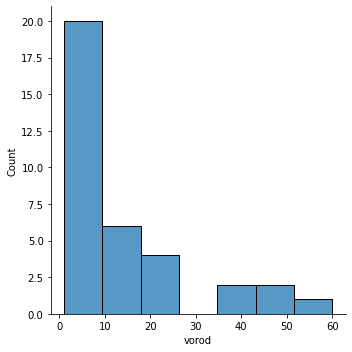

In [ ]:
sns.displot(data = df , x="vorod" )

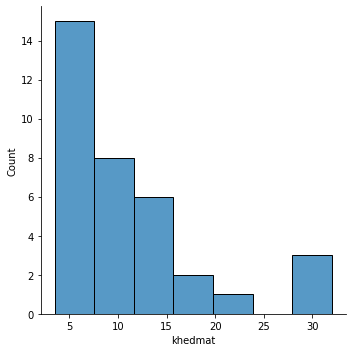

In [ ]:
sns.displot(data = df , x="khedmat" )

,sumsquare_error,aic,bic,kl_div
gamma,0.145030,1048.698762,-181.349588,inf
burr,0.153626,1086.437770,-175.778938,inf
beta,0.160608,921.272203,-174.223479,inf
longnorm,inf,inf,inf,inf


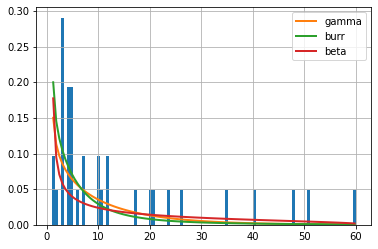

In [ ]:
f = Fitter(df['vorod'].values , 
           distributions = ['gamma' , 'longnorm','beta','burr'])
f.fit()
f.summary()

In [ ]:
f.get_best(method="sumsquare_error")

{'gamma': {'a': 0.7875331287729527,
  'loc': 0.9999999999999998,
  'scale': 12.150739700359486}}

In [ ]:
f.get_best(method="aic")

{'beta': {'a': 0.4335875208606699,
  'b': 1.4471518063600224,
  'loc': 0.9999999999999999,
  'scale': 60.61802320697798}}

In [ ]:
f.get_best(method="bic")

{'gamma': {'a': 0.7875331287729527,
  'loc': 0.9999999999999998,
  'scale': 12.150739700359486}}

In [ ]:
f.fitted_param["gamma"]

(0.7875331287729527, 0.9999999999999998, 12.150739700359486)

,sumsquare_error,aic,bic,kl_div
lognorm,0.136349,1010.011237,-183.510065,inf
cauchy,0.138734,1189.521182,-186.458455,inf
gamma,0.145030,1048.698762,-181.349588,inf
expon,0.145866,979.603515,-184.703923,inf
exponpow,0.155639,936.015096,-178.878720,inf


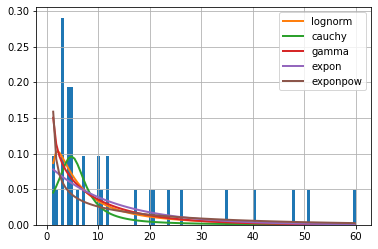

In [ ]:
f1 = Fitter(df['vorod'] , distributions=get_common_distributions())
f1.fit()
f1.summary()

In [ ]:
f1.get_best(method="sumsquare_error")

{'lognorm': {'loc': 0.5662863740426816,
  's': 1.2195408119259323,
  'scale': 6.646350881168303}}

In [ ]:
f1.get_best(method="aic")

{'uniform': {'loc': 1.0, 'scale': 59.0}}

In [ ]:
f1.get_best(method="bic")

{'cauchy': {'loc': 4.813169464345007, 'scale': 3.3160706482993065}}

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


,sumsquare_error,aic,bic,kl_div
johnsonsu,0.126951,1032.860180,-182.454104,inf
gennorm,0.128924,1169.120568,-185.469751,inf
t,0.129073,1193.910410,-185.429256,inf
alpha,0.131918,1036.161124,-184.666294,inf
nct,0.132157,1040.594000,-181.047568,inf


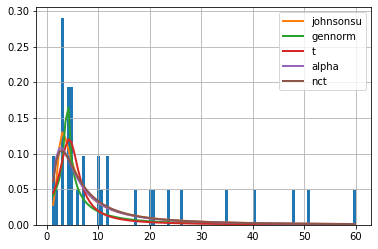

In [ ]:
f2 = Fitter(df['vorod'] , distributions=get_distributions())
f2.fit()
f2.summary()

In [ ]:
f2.get_best(method="sumsquare_error")

{'johnsonsu': {'a': -1.3418327469743563,
  'b': 0.6462520267072976,
  'loc': 2.347356881798065,
  'scale': 1.064239801274772}}

In [ ]:
f2.get_best(method="aic")

{'vonmises': {'kappa': 1.854586902343308,
  'loc': 2.302222191337367,
  'scale': 0.00035367764612121344}}

In [ ]:
f2.get_best(method="bic")

{'halfcauchy': {'loc': 0.9999999995683353, 'scale': 5.806097738261556}}

,sumsquare_error,aic,bic,kl_div
expon,0.359487,784.236308,-153.134172,inf
chi2,0.362728,790.671818,-149.264671,inf
lognorm,0.367571,808.444386,-148.800483,inf
exponpow,0.381133,762.013585,-147.532395,inf
gamma,0.384949,808.040741,-147.183705,inf


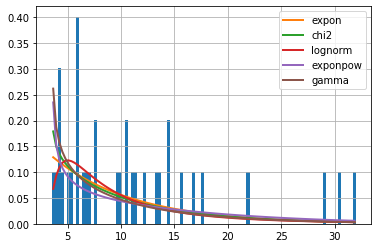

In [ ]:
f3 = Fitter(df['khedmat'] , 
            distributions=get_common_distributions())
f3.fit()
f3.summary()

In [ ]:
f3.get_best(method='sumsquare_error')

{'expon': {'loc': 3.5, 'scale': 7.617142857142857}}

In [ ]:
f3.get_best(method='aic')

{'uniform': {'loc': 3.5, 'scale': 28.5}}

In [ ]:
f3.get_best(method='bic')

{'expon': {'loc': 3.5, 'scale': 7.617142857142857}}

In [ ]:
f3.fitted_param['expon']

(3.5, 7.617142857142857)

,sumsquare_error,aic,bic,kl_div
johnsonsb,0.357978,753.915951,-146.170695,inf
recipinvgauss,0.358764,793.182774,-149.649317,inf
exponnorm,0.358886,787.160708,-149.637416,inf
lomax,0.359105,789.511394,-149.616086,inf
halfgennorm,0.359449,786.343478,-149.582505,inf


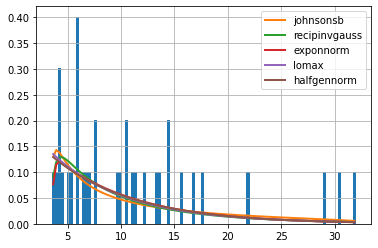

In [ ]:
f4 = Fitter(df['khedmat'] , 
            distributions=get_distributions())
f4.fit()
f4.summary()

In [ ]:
f4.get_best(method='sumsquare_error')

{'johnsonsb': {'a': 0.9942804512843085,
  'b': 0.6240897920613417,
  'loc': 3.3878329789810504,
  'scale': 31.919445246870847}}

In [ ]:
f4.get_best(method='aic')

{'vonmises': {'kappa': 0.0228101079987516,
  'loc': 6.856556650657046,
  'scale': 1.458881271198579e-25}}

In [ ]:
f4.get_best(method='bic')

{'expon': {'loc': 3.5, 'scale': 7.617142857142857}}